In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
#url = 'Resources/fma_3secs.csv'
orignial_df = pd.read_csv(Path('Resources/model_data_3sec.csv'))
orignial_df

,Unnamed: 0,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0,1-000574.mp3,0.381544,0.080175,0.249562,0.001513,1957.407156,39590.736312,2048.485350,25901.153997,...,30.766535,-8.990259,43.198818,1.595329,27.528227,-6.731744,34.697533,4.317326,35.314476,Rock
1,2,3-000574.mp3,0.484288,0.069135,0.253424,0.001391,2766.351306,309436.169216,2542.654962,168310.924937,...,25.085670,-7.587147,42.912727,0.172193,30.070772,-5.444875,14.732526,1.197923,23.562773,Rock
2,3,4-000574.mp3,0.425569,0.074970,0.256628,0.001596,2908.207536,157800.863917,2703.913526,39721.816727,...,21.063715,-8.594354,15.883783,-0.271126,27.283262,-5.592191,24.557570,-0.288590,14.412757,Rock
3,4,5-000574.mp3,0.468948,0.066816,0.265448,0.001309,2618.340173,129314.679539,2548.584807,34028.788419,...,23.539871,-9.315182,17.867613,-3.543423,15.073790,-5.760088,25.771444,2.120627,32.800819,Rock
4,5,6-000574.mp3,0.392290,0.079841,0.271375,0.001388,2767.550410,159341.482509,2663.721676,52306.024210,...,30.794027,-8.423706,22.058167,-0.152457,19.684511,-4.535352,17.765066,2.383680,14.638711,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71941,79935,6-155066.mp3,0.457243,0.066993,0.243057,0.000386,483.225740,45172.684403,875.708502,266648.246421,...,44.069397,4.513030,35.256451,4.309551,25.806019,9.335838,30.525654,4.856527,22.975540,Hip-Hop
71942,79936,7-155066.mp3,0.447897,0.071476,0.234766,0.000319,660.113748,112158.840869,1349.132689,567015.357017,...,94.042519,1.916095,32.742737,2.931519,26.395258,7.093570,41.896832,5.723800,27.765524,Hip-Hop
71943,79937,8-155066.mp3,0.444989,0.068753,0.230987,0.000125,631.195340,129673.607382,1317.927939,579189.561418,...,42.242142,4.368050,34.333134,4.368290,35.798908,7.466063,37.081589,1.732873,36.141926,Hip-Hop
71944,79938,9-155066.mp3,0.485998,0.070497,0.233158,0.000335,616.469137,113308.485962,1299.877639,574072.621801,...,32.535034,1.273448,29.834116,4.322249,15.078435,9.085366,24.073069,6.584610,37.525909,Hip-Hop


In [3]:
#drop label and filename columns
X = orignial_df.drop(['label','filename'], axis=1)
# get label values 
y = orignial_df['label']
y.unique()

array(['Rock', 'Folk', 'Experimental', 'Hip-Hop', 'International', 'Pop',
       'Electronic', 'Instrumental'], dtype=object)

### Code with VAR features

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
# Create a StandardScaler() model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:

rf_model = RandomForestClassifier(random_state=1, n_estimators=200).fit(X_train_scaled, y_train)
print(f'Training Score: {rf_model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf_model.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.7169066548062489


### Code without Var features

In [7]:
X = X[X.columns.drop(list(X.filter(regex='var')))]
X

,Unnamed: 0,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean,tempo,...,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
0,0,0.381544,0.249562,1957.407156,2048.485350,3585.029860,0.100943,0.000052,0.000068,112.347147,...,3.019332,3.665317,-9.748421,2.995540,-4.559982,-2.866331,-8.990259,1.595329,-6.731744,4.317326
1,2,0.484288,0.253424,2766.351306,2542.654962,5738.018893,0.158905,0.000034,-0.000009,117.453835,...,-3.049455,2.144493,-9.148898,4.389838,-6.054724,-3.617906,-7.587147,0.172193,-5.444875,1.197923
2,3,0.425569,0.256628,2908.207536,2703.913526,6252.910907,0.163713,0.000011,-0.000250,117.453835,...,-5.784952,3.680824,-10.186584,2.543274,-6.967072,-2.589857,-8.594354,-0.271126,-5.592191,-0.288590
3,4,0.468948,0.265448,2618.340173,2548.584807,5554.903846,0.139870,-0.000049,-0.000192,123.046875,...,-8.235471,1.791170,-8.883386,-0.221089,-7.038162,-2.001146,-9.315182,-3.543423,-5.760088,2.120627
4,5,0.392290,0.271375,2767.550410,2663.721676,5940.845102,0.146143,-0.000054,-0.000268,117.453835,...,2.061754,-0.329844,-7.563095,4.706252,-5.521904,-4.830932,-8.423706,-0.152457,-4.535352,2.383680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71941,79935,0.457243,0.243057,483.225740,875.708502,703.804462,0.019449,0.000010,-0.000006,135.999178,...,-1.636234,6.133297,4.796370,2.530937,7.792923,14.952423,4.513030,4.309551,9.335838,4.856527
71942,79936,0.447897,0.234766,660.113748,1349.132689,775.692233,0.019035,-0.000303,0.000336,135.999178,...,-3.726220,7.489089,2.066535,1.700049,2.323061,7.850317,1.916095,2.931519,7.093570,5.723800
71943,79937,0.444989,0.230987,631.195340,1317.927939,887.664889,0.014461,0.000217,-0.000002,135.999178,...,-3.057849,6.231783,3.418291,4.423429,6.805921,10.383173,4.368050,4.368290,7.466063,1.732873
71944,79938,0.485998,0.233158,616.469137,1299.877639,730.638146,0.018412,-0.000048,0.000080,135.999178,...,-3.458435,7.796859,3.189467,2.171970,2.082361,6.422930,1.273448,4.322249,9.085366,6.584610


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
# Create a StandardScaler() model and fit it to the training data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:

rf_model = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {rf_model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf_model.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.7591037971868572


In [11]:
predictions = rf_model.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
23236,International,International
22388,Instrumental,Pop
66136,Electronic,Electronic
39852,Instrumental,Electronic
47809,International,International
...,...,...
1738,Folk,Folk
48011,Electronic,Electronic
64870,Electronic,Electronic
42362,Electronic,Electronic


In [12]:
from sklearn.metrics import classification_report
y_pred = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

   Electronic       0.77      0.72      0.75      2220
 Experimental       0.83      0.71      0.76      2198
         Folk       0.68      0.82      0.74      2207
      Hip-Hop       0.74      0.82      0.78      2272
 Instrumental       0.78      0.81      0.79      2271
International       0.77      0.76      0.77      2301
          Pop       0.76      0.63      0.69      2201
         Rock       0.77      0.79      0.78      2317

     accuracy                           0.76     17987
    macro avg       0.76      0.76      0.76     17987
 weighted avg       0.76      0.76      0.76     17987



### Removing low importance features

[0.07697236 0.04859031 0.0428919  0.03328522 0.03966664 0.03481103
 0.03155949 0.02761839 0.0280671  0.02401909 0.04773892 0.03512923
 0.04042218 0.03550736 0.03235231 0.02964252 0.02841786 0.02946055
 0.02854366 0.02749624 0.02878321 0.02671504 0.0282743  0.02936407
 0.0294657  0.0291405  0.02806553 0.02593261 0.02532255 0.02674413]


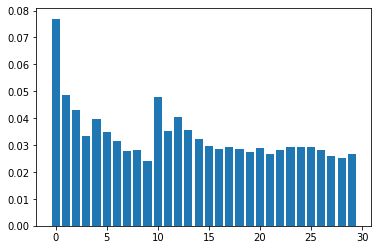

In [13]:
#shows features that contirbutes the most
features = rf_model.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [14]:
#select form features that contributes the most
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rf_model)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True,  True,  True, False,  True,  True, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [15]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [16]:
lr_model_sel = LogisticRegression()
lr_model_sel.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {lr_model_sel.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {lr_model_sel.score(X_selected_test_scaled, y_test)}')

Training Score: 0.37737912118460315
Testing Score: 0.3663201200867293


In [17]:
rf_model_sel = RandomForestClassifier(random_state=1, n_estimators=10).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {rf_model_sel.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {rf_model_sel.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9940695713412036
Testing Score: 0.6646466892755879


from sklearn.neighbors import KNeighborsClassifier


train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_selected_train_scaled, y_train)
    train_score = knn.score(X_selected_train_scaled, y_train)
    test_score = knn.score(X_selected_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [19]:
from joblib import dump, load
dump(rf_model, 'Model/3_sec_model_RF.joblib') 

['Model/3_sec_model_RF.joblib']